In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

sns.set_theme()

In [4]:
df = pd.read_csv('C:\\Asus WebStorage\\psabin@gmail.com\\MySyncFolder\\Data Science Course\\Used CSVs\\CSB_2021-2023_All.csv')
display(df.head())

C:\Users\psabi\AppData\Local\Temp\ipykernel_5180\999932228.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Asus WebStorage\\psabin@gmail.com\\MySyncFolder\\Data Science Course\\Used CSVs\\CSB_2021-2023_All.csv')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [5]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180626 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 811.4+ MB


None

In [6]:
display(df['rideable_type'].value_counts())


rideable_type
classic_bike     6157609
electric_bike    1521056
docked_bike       501961
Name: count, dtype: int64

In [7]:
docked_bike_mask = df['rideable_type'] == 'docked_bike'


In [8]:
display(df.sample(5))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6008716,D9F30D285B660D83,electric_bike,2022-11-24 01:14:18,2022-11-24 01:22:16,NaN,NaN,NaN,NaN,38.910000,-77.020000,38.910000,-77.020000,casual
151366,D820308280762E7C,classic_bike,2021-02-21 13:08:27,2021-02-21 14:35:44,New Hampshire Ave & T St NW,31229,NaN,NaN,38.915544,-77.038252,38.910000,-77.040000,member
6971213,326AAF0FFCD3B759,docked_bike,2023-04-04 13:54:51,2023-04-04 15:22:34,Jefferson Dr & 14th St SW,31247.0,Jefferson Dr & 14th St SW,31247.0,38.888553,-77.032427,38.888553,-77.032427,casual
318342,625CFA44173DB7DA,docked_bike,2021-03-27 14:36:42,2021-03-27 15:03:06,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,17th St & Independence Ave SW,31290.0,38.888774,-77.028694,38.888097,-77.038325,casual
5465837,9ECC7A88B423A405,classic_bike,2022-10-02 09:18:04,2022-10-02 09:19:05,21st & I St NW,31205.0,21st St & G st NW,31328.0,38.900711,-77.046449,38.898302,-77.046913,member


In [9]:
display(df[docked_bike_mask]['member_casual'].value_counts())


member_casual
casual    501957
member         4
Name: count, dtype: int64

In [10]:
classic_mask = df['rideable_type'] == 'classic_bike'
classic = df[classic_mask].copy()
display(classic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6157609 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 657.7+ MB


None

In [11]:
classic.drop(['rideable_type'], axis=1, inplace=True)
display(classic.head())

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
3,91F95E512CABC46A,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
6,0535306B61EF92F9,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual
9,874D92427D41BC30,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,38.913046,-77.032008,member


In [12]:
display(classic.tail())

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
8180616,02F192BCA07B45AF,2023-06-30 23:56:15,2023-07-01 00:02:41,Park Pl & Rock Creek Church Rd NW,31137.0,11th & Kenyon St NW,31102.0,38.937135,-77.019125,38.929464,-77.027822,member
8180618,A23BD8CBD6322DD3,2023-06-30 23:56:49,2023-07-01 00:43:54,15th St & Constitution Ave NW,31321.0,14th St & Rhode Island Ave NW,31203.0,38.892244,-77.033234,38.908600,-77.032300,casual
8180622,0448FEEB78F2B08D,2023-06-30 23:58:14,2023-07-01 00:24:14,18th & New Hampshire Ave NW,31324.0,Massachusetts Ave & Dupont Circle NW,31200.0,38.911268,-77.041829,38.910100,-77.044400,casual
8180623,5BE258BC59548BE9,2023-06-30 23:58:26,2023-07-01 00:20:06,18th & New Hampshire Ave NW,31324.0,Massachusetts Ave & Dupont Circle NW,31200.0,38.911268,-77.041829,38.910100,-77.044400,casual
8180625,31813068FD8A3720,2023-06-30 23:59:35,2023-07-01 00:38:55,National Harbor Carousel,32423.0,National Harbor Carousel,32423.0,38.785900,-77.016700,38.785900,-77.016700,casual


In [13]:
electric_bike_mask = df['rideable_type'] == 'electric_bike'
station_value_counts_electic = df[electric_bike_mask]['start_station_id'].value_counts()

In [14]:
endstation_value_counts_electric = df[electric_bike_mask]['end_station_id'].value_counts()

In [15]:
classic['weekend'] = classic['started_at'].dt.dayofweek >= 5

In [16]:
# Assuming 'start_time' is your datetime column:
classic['morning'] = classic['started_at'].dt.hour.between(1, 13)


In [17]:
display(classic.sample(20))

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekend,morning
5791374,C6D0586CEB817F9A,2022-10-31 21:29:31,2022-10-31 21:32:33,5th St & Massachusetts Ave NW,31265.0,1st & H St NW,31638.0,38.900930,-77.018677,38.900358,-77.012108,member,False,False
634980,D147A3A4CF62213F,2021-05-10 12:40:30,2021-05-10 12:51:57,Rosedale Rec Center,31658.0,3rd & H St NE,31616.0,38.897808,-76.979634,38.900412,-77.001949,casual,False,True
6121013,AB730107007BED7F,2022-12-09 20:58:40,2022-12-09 21:20:18,13th & U St NW,31132.0,6th & K St NE,31645.0,38.916936,-77.029631,38.902932,-76.998405,member,False,False
2780242,51AE7701C43FBB2F,2022-01-11 18:05:05,2022-01-11 18:19:03,8th & V St NW,31134.0,11th & Park Rd NW,31651.0,38.917716,-77.022684,38.931322,-77.028247,member,False,False
6033253,4AA7EBD69BBD1B8D,2022-11-28 16:19:00,2022-11-28 16:25:14,14th & Rhode Island Ave NW,31203.0,20th & O St NW / Dupont South,31234.0,38.908600,-77.032300,38.908905,-77.044780,member,False,False
7192742,4B30672DC9E9D2DB,2023-04-20 15:08:16,2023-04-20 15:41:12,St. Elizabeths West Campus/DHS,31827.0,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,38.853124,-77.005174,38.888774,-77.028694,casual,False,False
1025018,A548723796007CBA,2021-06-23 19:21:01,2021-06-23 19:40:09,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,Maine Ave & 9th St SW,31646.0,38.890539,-77.049383,38.880440,-77.025236,member,False,False
6333239,2C466D04B12F7613,2023-01-16 18:46:40,2023-01-16 19:02:00,GMU/Fairfax Dr & Kenmore St,31040.0,Rosslyn Metro / Wilson Blvd & N Moore St,31947.0,38.884703,-77.100302,38.896087,-77.071452,casual,False,False
1186215,9091F6AFE58E87CE,2021-07-09 22:18:46,2021-07-09 22:27:24,18th & C St NW,31284.0,18th & C St NW,31284.0,38.893511,-77.041544,38.893511,-77.041544,casual,False,False
21979,0B12F7428B6E0711,2021-01-08 13:39:20,2021-01-08 13:48:39,8th & D St NW,31270.0,5th & K St NW,31600.0,38.894851,-77.023240,38.903040,-77.019027,casual,False,True


In [18]:
endstation_value_counts = classic['end_station_name'].value_counts()
display(endstation_value_counts.head(50))

end_station_name
New Hampshire Ave & T St NW                              72098
15th & P St NW                                           68783
Columbus Circle / Union Station                          66962
1st & M St NE                                            60135
Lincoln Memorial                                         53400
Massachusetts Ave & Dupont Circle NW                     53196
5th & K St NW                                            53147
14th & V St NW                                           51468
Jefferson Dr & 14th St SW                                50654
4th St & Madison Dr NW                                   50056
Eastern Market Metro / Pennsylvania Ave & 8th St SE      49880
14th & R St NW                                           47207
8th & O St NW                                            46682
17th & Corcoran St NW                                    45917
Smithsonian-National Mall / Jefferson Dr & 12th St SW    44749
15th & W St NW                        

In [19]:
# Count the start stations
startstation_value_counts = classic['start_station_name'].value_counts()

# Count the end stations (already done in your case)
endstation_value_counts = classic['end_station_name'].value_counts()

# Calculate the net total for each station
# Subtracting the Series will align on the index automatically
net_total = startstation_value_counts.subtract(endstation_value_counts, fill_value=0)

# net_total now contains the net total for each station.
# If a station name doesn't exist in one of the Series, it assumes a count of 0 for subtraction
display(net_total.head(20))


10th & E St NW                             -3336.0
10th & Florida Ave NW                        221.0
10th & G St NW                             -5159.0
10th & H St NE                              -465.0
10th & K St NW                                35.0
10th & Monroe St NE                         1289.0
10th & Quincy St NE / Turkey Thicket Rec      -6.0
10th & Rhode Island Ave NE                    -1.0
10th & U St NW                                25.0
10th St & Constitution Ave NW              -2699.0
10th St & Florida Ave NW                     374.0
10th St & L'Enfant Plaza SW                 -477.0
10th St & Rhode Island Ave NE                  9.0
10th St & Spring Rd NW                       220.0
11th & C St SE                               126.0
11th & Clifton St NW                        1219.0
11th & F St NW                             -2508.0
11th & Girard St NW                         4482.0
11th & H St NE                               -63.0
11th & Kenyon St NW            

In [20]:
# Convert the net_total Series to a DataFrame and name the column 'net_total'
stations = net_total.to_frame(name='net_total')

# Transform station names from the index to a column
stations.reset_index(inplace=True)

# Rename the 'index' column to 'station_name' for clarity
stations.rename(columns={'index': 'station_name'}, inplace=True)



In [21]:
# Drop duplicates to ensure one-to-one mapping for the merge
unique_stations = classic[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']].drop_duplicates('start_station_name')

# Merge the unique stations with the 'stations' DataFrame based on the station name
stations = stations.merge(unique_stations, left_on='station_name', right_on='start_station_name', how='left')

# Now 'stations' has the additional columns merged based on matching station names
# Optionally, if you don't need the 'start_station_name' column anymore, you can drop it
# stations.drop('start_station_name', axis=1, inplace=True)


In [22]:
stations.drop('start_station_name', axis=1, inplace=True)

In [23]:
display(stations.isna().sum())

station_name        0
net_total           0
start_station_id    5
start_lat           5
start_lng           5
dtype: int64

In [24]:
# Create a DataFrame of unique end stations from 'classic'
unique_end_stations = classic[['end_station_name', 'end_station_id', 'end_lat', 'end_lng']].drop_duplicates('end_station_name')

# Merge with 'stations' DataFrame where the 'start_station_id' is NaN
nan_stations = stations[stations['start_station_id'].isna()]
updated_nan_stations = nan_stations.merge(unique_end_stations, left_on='station_name', right_on='end_station_name', how='left')

# Now, updated_nan_stations contains the rows with NaN filled in from the 'end' columns where possible
# Rename the columns to match the 'stations' DataFrame
updated_nan_stations.drop(['start_station_id','start_lat','start_lng'], axis=1, inplace=True)
updated_nan_stations.rename(columns={
    'end_station_id': 'start_station_id',
    'end_lat': 'start_lat',
    'end_lng': 'start_lng'
}, inplace=True)

# Drop the unwanted 'end_station_name' column
updated_nan_stations.drop('end_station_name', axis=1, inplace=True)




In [25]:
# Now, let's update the stations DataFrame
nan_mask = stations['start_station_id'].isna()
for column in ['start_station_id', 'start_lat', 'start_lng']:
    # Use 'station_name' to align the updated data correctly
    stations.loc[nan_mask, column] = stations.loc[nan_mask, 'station_name'].map(updated_nan_stations.set_index('station_name')[column])

In [26]:
display(endstation_value_counts.head())

end_station_name
New Hampshire Ave & T St NW        72098
15th & P St NW                     68783
Columbus Circle / Union Station    66962
1st & M St NE                      60135
Lincoln Memorial                   53400
Name: count, dtype: int64

In [27]:
# Ensure the index of the Series is named 'station_name'
startstation_value_counts.index.name = 'station_name'
endstation_value_counts.index.name = 'station_name'

# Convert the Series to a DataFrame
start_counts_df = startstation_value_counts.reset_index().rename(columns={startstation_value_counts.name: 'start_count'})
end_counts_df = endstation_value_counts.reset_index().rename(columns={endstation_value_counts.name: 'end_count'})

# Merge with the 'stations' DataFrame on 'station_name'
stations = stations.merge(start_counts_df, on='station_name', how='left')
stations = stations.merge(end_counts_df, on='station_name', how='left')


In [28]:
display(stations.sample(15))

,station_name,net_total,start_station_id,start_lat,start_lng,start_count,end_count
51,14th & Otis Pl NW,6485.0,31131.0,38.934405,-77.032687,16794.0,10309.0
389,Four Mile Run Dr & S Walter Reed Dr,-40.0,31059.0,38.847360,-77.095431,1456.0,1496.0
513,Mandeville Ln & Stovall St,-7.0,31974.0,38.802893,-77.072558,522.0,529.0
143,23rd & M St NW,-6393.0,31128.0,38.905303,-77.050264,33829.0,40222.0
262,Barton St & 10th St N,526.0,31050.0,38.884961,-77.087770,1663.0,1137.0
127,20th & Columbia Rd NW,6625.0,31133.0,38.918036,-77.045487,18926.0,12301.0
98,18th St & Pennsylvania Ave NW,-1879.0,31242.0,38.899680,-77.041539,15490.0,17369.0
215,8th & D St NW,-3731.0,31270.0,38.894851,-77.023240,16989.0,20720.0
138,22nd & H St NW,-509.0,31127.0,38.898925,-77.048852,16873.0,17382.0
607,Pennsylvania Ave & Park Ave,-63.0,32603.0,38.887403,-77.176992,691.0,754.0


In [29]:
stations['start_count'].fillna(0, inplace=True)
stations['end_count'].fillna(0, inplace=True)


In [30]:
display(classic.sample(5))

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekend,morning
5788815,CCCBB35292A03C2E,2022-10-31 15:40:50,2022-10-31 15:45:42,11th & O St NW,31286.0,11th & M St NW,31266.0,38.908430,-77.027140,38.905578,-77.027313,member,False,False
2728148,BFFFF33AB8894184,2021-12-27 13:47:41,2021-12-27 14:05:14,New Jersey Ave & N St NW/Dunbar HS,31636.0,New York Ave & Hecht Ave NE,31518.0,38.907333,-77.015360,38.915604,-76.983683,member,False,True
7755592,88B35904847C6F0D,2023-06-01 13:52:33,2023-06-01 14:19:15,Ward Circle / American University,31301.0,8th & O St NW,31281.0,38.938736,-77.087171,38.908640,-77.022770,member,False,True
1831190,11668CF8889D9B75,2021-09-15 16:48:27,2021-09-15 17:11:51,4th & W St NE,31500.0,4th St & G St SW,31666.0,38.919077,-77.000648,38.881123,-77.017658,member,False,False
2313781,7A2C789DB69796C0,2021-10-31 16:40:38,2021-10-31 16:50:39,7th & K St NW,31653.0,6th & K St NE,31645.0,38.902674,-77.021392,38.902932,-76.998405,member,True,False


In [31]:
# Filter for AM: 'weekend' is False and 'morning' is True
am_filter = (classic['weekend'] == False) & (classic['morning'] == True)
# Filter for PM: 'weekend' is False and 'morning' is False
pm_filter = (classic['weekend'] == False) & (classic['morning'] == False)

# Count the start stations for AM and PM
weekday_am_startstation_value_counts = classic.loc[am_filter, 'start_station_name'].value_counts()
weekday_pm_startstation_value_counts = classic.loc[pm_filter, 'start_station_name'].value_counts()

# Count the end stations for AM and PM
weekday_am_endstation_value_counts = classic.loc[am_filter, 'end_station_name'].value_counts()
weekday_pm_endstation_value_counts = classic.loc[pm_filter, 'end_station_name'].value_counts()

# Calculate the net total for each station for AM and PM
weekday_am_net = weekday_am_startstation_value_counts.subtract(weekday_am_endstation_value_counts, fill_value=0)
weekday_pm_net = weekday_pm_startstation_value_counts.subtract(weekday_pm_endstation_value_counts, fill_value=0)


In [32]:
display(weekday_am_net.head())

10th & E St NW          -5271.0
10th & Florida Ave NW    1835.0
10th & G St NW          -4862.0
10th & H St NE           1815.0
10th & K St NW          -2160.0
Name: count, dtype: float64

In [33]:
# Ensure the index of the Series is named 'station_name'
weekday_am_net.index.name = 'station_name'
weekday_pm_net.index.name = 'station_name'

# Convert the Series to a DataFrame
weekday_am_df = weekday_am_net.reset_index().rename(columns={weekday_am_net.name: 'weekday_am_net'})
weekday_pm_df = weekday_pm_net.reset_index().rename(columns={weekday_pm_net.name: 'weekday_pm_net'})

# Merge with the 'stations' DataFrame on 'station_name'
stations = stations.merge(weekday_am_df, on='station_name', how='left')
stations = stations.merge(weekday_pm_df, on='station_name', how='left')

In [34]:
display(stations.sample(5))

,station_name,net_total,start_station_id,start_lat,start_lng,start_count,end_count,weekday_am_net,weekday_pm_net
718,Takoma Metro,602.0,31408.0,38.975219,-77.016855,5777.0,5175.0,-1278.0,1688.0
472,L'Enfant Plaza / 7th & C St SW,-225.0,31218.0,38.886266,-77.022241,15112.0,15337.0,-1097.0,1235.0
592,North Village and Park Garden,-1.0,32256.0,38.983199,-77.341823,108.0,109.0,1.0,-2.0
398,Garland Ave & Walden Rd,-28.0,32082.0,39.000480,-77.000770,441.0,469.0,50.0,-72.0
450,Kenilworth Terr & Hayes St. NE,5.0,31717.0,38.900468,-76.947287,198.0,193.0,14.0,-10.0


In [35]:
# Filter for AM: 'weekend' is False and 'morning' is True
fun_am_filter = (classic['weekend'] == True) & (classic['morning'] == True)
# Filter for PM: 'weekend' is False and 'morning' is False
fun_pm_filter = (classic['weekend'] == True) & (classic['morning'] == False)

# Count the start stations for AM and PM
fun_am_startstation_value_counts = classic.loc[fun_am_filter, 'start_station_name'].value_counts()
fun_pm_startstation_value_counts = classic.loc[fun_pm_filter, 'start_station_name'].value_counts()

# Count the end stations for AM and PM
fun_am_endstation_value_counts = classic.loc[fun_am_filter, 'end_station_name'].value_counts()
fun_pm_endstation_value_counts = classic.loc[fun_pm_filter, 'end_station_name'].value_counts()

# Calculate the net total for each station for AM and PM
fun_am_net = fun_am_startstation_value_counts.subtract(fun_am_endstation_value_counts, fill_value=0)
fun_pm_net = fun_pm_startstation_value_counts.subtract(fun_pm_endstation_value_counts, fill_value=0)

In [36]:
# Ensure the index of the Series is named 'station_name'
fun_am_net.index.name = 'station_name'
fun_pm_net.index.name = 'station_name'

# Convert the Series to a DataFrame
fun_am_df = fun_am_net.reset_index().rename(columns={fun_am_net.name: 'fun_am_net'})
fun_pm_df = fun_pm_net.reset_index().rename(columns={fun_pm_net.name: 'fun_pm_net'})

# Merge with the 'stations' DataFrame on 'station_name'
stations = stations.merge(fun_am_df, on='station_name', how='left')
stations = stations.merge(fun_pm_df, on='station_name', how='left')

In [37]:
print(stations.columns)

Index(['station_name', 'net_total', 'start_station_id', 'start_lat',
       'start_lng', 'start_count', 'end_count', 'weekday_am_net',
       'weekday_pm_net', 'fun_am_net', 'fun_pm_net'],
      dtype='object')


In [38]:
stations = stations.reindex(columns=['station_name','start_count', 'end_count', 'net_total', 'weekday_am_net',
       'weekday_pm_net', 'fun_am_net', 'fun_pm_net', 'start_station_id', 'start_lat',
       'start_lng'])
display(stations.sample(5))

,station_name,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng
370,Fallsgrove Blvd & Fallsgrove Dr,361.0,360.0,1.0,34.0,-34.0,3.0,-2.0,32004.0,39.096312,-77.192672
187,4th & M St SE,17422.0,21274.0,-3852.0,-3755.0,1234.0,-1001.0,-330.0,31652.0,38.876751,-77.000736
48,14th & L St NW,21482.0,21976.0,-494.0,-2835.0,2193.0,415.0,-267.0,31283.0,38.903658,-77.031737
173,3rd & Tingey St SE,16236.0,18748.0,-2512.0,-1074.0,-854.0,-554.0,-30.0,31634.0,38.875010,-77.002400
75,15th St & N Scott St,4101.0,3435.0,666.0,872.0,-386.0,247.0,-67.0,31031.0,38.890540,-77.080950


In [39]:
stations['weekday_am_net'] = stations['weekday_am_net'] * -1
stations['weekday_pm_net'] = stations['weekday_pm_net'] * -1
stations['fun_am_net'] = stations['fun_am_net'] * -1
stations['fun_pm_net'] = stations['fun_pm_net'] * -1

In [40]:
stations['net_total'] = stations['net_total'] * -1

In [41]:
stations = stations.fillna(0)

In [42]:
copy_stations = stations.copy()

In [43]:
display(stations.sample(10))

,station_name,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng
232,American University East Campus,4978.0,2650.0,-2328.0,-441.0,-1336.0,-222.0,-329.0,31320.0,38.936298,-77.087128
272,Braddock Rd Metro North,2172.0,2017.0,-155.0,84.0,-135.0,-19.0,-85.0,31047.0,38.814577,-77.052808
305,Columbia Pike & S Taylor St,202.0,216.0,14.0,-15.0,6.0,-2.0,25.0,31923.0,38.858524,-77.103728
421,Green Range Dr and Glade Dr,113.0,117.0,4.0,-7.0,9.0,-3.0,5.0,32249.0,38.939617,-77.366786
654,Riggs Rd & East West Hwy,334.0,368.0,34.0,-8.0,38.0,-0.0,4.0,32414.0,38.972500,-76.980700
775,Washington Blvd & Walter Reed Dr,1973.0,2040.0,67.0,-162.0,192.0,-66.0,103.0,31073.0,38.873219,-77.082104
446,Jones Branch Drive & Scotts Crossing Rd,143.0,149.0,6.0,30.0,-23.0,-10.0,9.0,32233.0,38.928502,-77.215624
140,22nd & P ST NW,27795.0,28857.0,1062.0,-1893.0,2328.0,157.0,470.0,31285.0,38.909394,-77.048728
609,Pentagon City Metro / 12th St & S Hayes St,9516.0,9942.0,426.0,1843.0,-1411.0,277.0,-283.0,31005.0,38.862303,-77.059936
724,The Mall at Prince Georges,1681.0,1698.0,17.0,129.0,-159.0,50.0,-3.0,32422.0,38.968842,-76.954171


In [44]:
display(stations.describe())

,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_lat,start_lng
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,7527.639364,7506.815403,-20.823961,-5.522005,-8.035452,-3.189487,-4.077017,38.862490,-76.972713
std,11249.576289,11503.753886,1518.887457,2038.215296,1571.600291,542.346813,362.816161,1.361834,2.696143
min,0.000000,0.000000,-9601.000000,-8397.000000,-7229.000000,-2029.000000,-3618.000000,0.000000,-77.368416
25%,470.000000,462.500000,-205.250000,-369.250000,-141.750000,-99.750000,-39.500000,38.877863,-77.094861
50%,2218.000000,2068.000000,-5.500000,-19.000000,4.000000,-7.000000,1.000000,38.899957,-77.045064
75%,10396.250000,9856.000000,119.000000,67.750000,207.250000,16.000000,49.750000,38.932856,-77.011933
max,72868.000000,72098.000000,7480.000000,10130.000000,8156.000000,3493.000000,1634.000000,39.125828,0.000000


In [45]:
display(stations.sort_values('net_total').head(20))

,station_name,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng
296,Columbia & Ontario Rd NW,28375.0,18774.0,-9601.0,-5587.0,-1419.0,-1672.0,-923.0,31296.0,38.924088,-77.040787
19,11th & Kenyon St NW,24474.0,15164.0,-9310.0,-5286.0,-1291.0,-1944.0,-789.0,31102.0,38.929464,-77.027822
604,Park Rd & Holmead Pl NW,21308.0,12880.0,-8428.0,-3870.0,-2093.0,-1427.0,-1038.0,31602.0,38.930800,-77.031500
47,14th & Irving St NW,32150.0,23959.0,-8191.0,-3128.0,-2882.0,-1036.0,-1145.0,31124.0,38.928552,-77.032224
308,Columbia Rd & Georgia Ave NW,16219.0,9551.0,-6668.0,-3933.0,-1148.0,-1090.0,-497.0,31115.0,38.928121,-77.023795
127,20th & Columbia Rd NW,18926.0,12301.0,-6625.0,-4629.0,-76.0,-1549.0,-371.0,31133.0,38.918036,-77.045487
51,14th & Otis Pl NW,16794.0,10309.0,-6485.0,-4028.0,-827.0,-1163.0,-467.0,31131.0,38.934405,-77.032687
307,Columbia Rd & Belmont St NW,19434.0,13051.0,-6383.0,-4492.0,114.0,-1373.0,-632.0,31113.0,38.920669,-77.043680
814,Woodley Park Metro / Calvert St & Connecticut ...,19783.0,14368.0,-5415.0,-1826.0,-1865.0,-853.0,-871.0,31323.0,38.923389,-77.051833
78,16th & Harvard St NW,12813.0,7571.0,-5242.0,-2611.0,-1197.0,-918.0,-516.0,31103.0,38.926088,-77.036536


In [46]:
# Calculate the 'bike add ratio' column as described
stations['bike_add_ratio'] = np.where(
    (stations['start_count'] + stations['end_count']) != 0,  # avoid division by zero
    stations['end_count'] / (stations['start_count'] + stations['end_count']),
    0  # set unbalanced to 0 if there's no start or end count
)

In [47]:
stations['bike_add_ratio'] = (stations['bike_add_ratio'] * 100).round(1)

In [48]:
stations['daily_usage'] = ((stations['start_count'] + stations['end_count']) / 911).round(2) 

In [49]:
display(stations.sort_values('start_count').tail(5))

,station_name,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng,bike_add_ratio,daily_usage
197,5th & K St NW,52301.0,53147.0,846.0,-4578.0,5121.0,-784.0,1087.0,31600.0,38.903040,-77.019027,50.4,115.75
117,1st & M St NE,59319.0,60135.0,816.0,-1776.0,2166.0,-667.0,1093.0,31603.0,38.905697,-77.005483,50.3,131.12
311,Columbus Circle / Union Station,66037.0,66962.0,925.0,5592.0,-3686.0,2183.0,-3164.0,31623.0,38.896960,-77.004930,50.3,145.99
71,15th & P St NW,67762.0,68783.0,1021.0,-2716.0,3835.0,-450.0,352.0,31201.0,38.909868,-77.034421,50.4,149.88
574,New Hampshire Ave & T St NW,72868.0,72098.0,-770.0,-8397.0,8156.0,-1628.0,1099.0,31229.0,38.915544,-77.038252,49.7,159.13


In [50]:
display(stations.sort_values('end_count').tail(5))

,station_name,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng,bike_add_ratio,daily_usage
492,Lincoln Memorial,50208.0,53400.0,3192.0,1460.0,-49.0,2605.0,-824.0,31258.0,38.888255,-77.049436,51.5,113.73
117,1st & M St NE,59319.0,60135.0,816.0,-1776.0,2166.0,-667.0,1093.0,31603.0,38.905697,-77.005483,50.3,131.12
311,Columbus Circle / Union Station,66037.0,66962.0,925.0,5592.0,-3686.0,2183.0,-3164.0,31623.0,38.896960,-77.004930,50.3,145.99
71,15th & P St NW,67762.0,68783.0,1021.0,-2716.0,3835.0,-450.0,352.0,31201.0,38.909868,-77.034421,50.4,149.88
574,New Hampshire Ave & T St NW,72868.0,72098.0,-770.0,-8397.0,8156.0,-1628.0,1099.0,31229.0,38.915544,-77.038252,49.7,159.13


In [51]:
display(stations.describe())

,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_lat,start_lng,bike_add_ratio,daily_usage
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,7527.639364,7506.815403,-20.823961,-5.522005,-8.035452,-3.189487,-4.077017,38.862490,-76.972713,49.153545,16.503142
std,11249.576289,11503.753886,1518.887457,2038.215296,1571.600291,542.346813,362.816161,1.361834,2.696143,6.930896,24.922111
min,0.000000,0.000000,-9601.000000,-8397.000000,-7229.000000,-2029.000000,-3618.000000,0.000000,-77.368416,0.000000,0.000000
25%,470.000000,462.500000,-205.250000,-369.250000,-141.750000,-99.750000,-39.500000,38.877863,-77.094861,47.100000,1.017500
50%,2218.000000,2068.000000,-5.500000,-19.000000,4.000000,-7.000000,1.000000,38.899957,-77.045064,49.800000,4.685000
75%,10396.250000,9856.000000,119.000000,67.750000,207.250000,16.000000,49.750000,38.932856,-77.011933,51.400000,22.895000
max,72868.000000,72098.000000,7480.000000,10130.000000,8156.000000,3493.000000,1634.000000,39.125828,0.000000,100.000000,159.130000


In [52]:
display(stations.sort_values('net_total').head(20))
display(stations.sort_values('net_total').tail(20))

,station_name,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng,bike_add_ratio,daily_usage
296,Columbia & Ontario Rd NW,28375.0,18774.0,-9601.0,-5587.0,-1419.0,-1672.0,-923.0,31296.0,38.924088,-77.040787,39.8,51.76
19,11th & Kenyon St NW,24474.0,15164.0,-9310.0,-5286.0,-1291.0,-1944.0,-789.0,31102.0,38.929464,-77.027822,38.3,43.51
604,Park Rd & Holmead Pl NW,21308.0,12880.0,-8428.0,-3870.0,-2093.0,-1427.0,-1038.0,31602.0,38.930800,-77.031500,37.7,37.53
47,14th & Irving St NW,32150.0,23959.0,-8191.0,-3128.0,-2882.0,-1036.0,-1145.0,31124.0,38.928552,-77.032224,42.7,61.59
308,Columbia Rd & Georgia Ave NW,16219.0,9551.0,-6668.0,-3933.0,-1148.0,-1090.0,-497.0,31115.0,38.928121,-77.023795,37.1,28.29
127,20th & Columbia Rd NW,18926.0,12301.0,-6625.0,-4629.0,-76.0,-1549.0,-371.0,31133.0,38.918036,-77.045487,39.4,34.28
51,14th & Otis Pl NW,16794.0,10309.0,-6485.0,-4028.0,-827.0,-1163.0,-467.0,31131.0,38.934405,-77.032687,38.0,29.75
307,Columbia Rd & Belmont St NW,19434.0,13051.0,-6383.0,-4492.0,114.0,-1373.0,-632.0,31113.0,38.920669,-77.043680,40.2,35.66
814,Woodley Park Metro / Calvert St & Connecticut ...,19783.0,14368.0,-5415.0,-1826.0,-1865.0,-853.0,-871.0,31323.0,38.923389,-77.051833,42.1,37.49
78,16th & Harvard St NW,12813.0,7571.0,-5242.0,-2611.0,-1197.0,-918.0,-516.0,31103.0,38.926088,-77.036536,37.1,22.38


,station_name,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng,bike_add_ratio,daily_usage
42,14th & D St NW / Ronald Reagan Building,14092.0,17661.0,3569.0,6107.0,-3851.0,1569.0,-256.0,31231.0,38.894514,-77.031617,55.6,34.86
94,18th & M St NW,23775.0,27411.0,3636.0,8454.0,-4505.0,-284.0,-29.0,31221.0,38.905067,-77.041779,53.6,56.19
504,M St & New Jersey Ave SE,11406.0,15051.0,3645.0,2269.0,275.0,584.0,517.0,31208.0,38.876300,-77.003700,56.9,29.04
215,8th & D St NW,16989.0,20720.0,3731.0,3677.0,-1049.0,1075.0,28.0,31270.0,38.894851,-77.023240,54.9,41.39
510,Maine Ave & 7th St SW,29984.0,33829.0,3845.0,1732.0,869.0,1991.0,-747.0,31609.0,38.878694,-77.023054,53.0,70.05
187,4th & M St SE,17422.0,21274.0,3852.0,3755.0,-1234.0,1001.0,330.0,31652.0,38.876751,-77.000736,55.0,42.48
76,15th St & Pennsylvania Ave NW,21288.0,25596.0,4308.0,4580.0,-1622.0,1486.0,-136.0,31129.0,38.896465,-77.033381,54.6,51.46
220,8th & H St NW,33368.0,37919.0,4551.0,3306.0,77.0,1081.0,87.0,31228.0,38.899700,-77.023086,53.2,78.25
505,M St & Pennsylvania Ave NW,32825.0,37419.0,4594.0,2584.0,457.0,2302.0,-749.0,31246.0,38.905126,-77.056887,53.3,77.11
501,Lynn St & 19th St North,9629.0,14512.0,4883.0,2509.0,1115.0,620.0,639.0,31014.0,38.897315,-77.070993,60.1,26.50


In [53]:
display(stations.describe())

,start_count,end_count,net_total,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_lat,start_lng,bike_add_ratio,daily_usage
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,7527.639364,7506.815403,-20.823961,-5.522005,-8.035452,-3.189487,-4.077017,38.862490,-76.972713,49.153545,16.503142
std,11249.576289,11503.753886,1518.887457,2038.215296,1571.600291,542.346813,362.816161,1.361834,2.696143,6.930896,24.922111
min,0.000000,0.000000,-9601.000000,-8397.000000,-7229.000000,-2029.000000,-3618.000000,0.000000,-77.368416,0.000000,0.000000
25%,470.000000,462.500000,-205.250000,-369.250000,-141.750000,-99.750000,-39.500000,38.877863,-77.094861,47.100000,1.017500
50%,2218.000000,2068.000000,-5.500000,-19.000000,4.000000,-7.000000,1.000000,38.899957,-77.045064,49.800000,4.685000
75%,10396.250000,9856.000000,119.000000,67.750000,207.250000,16.000000,49.750000,38.932856,-77.011933,51.400000,22.895000
max,72868.000000,72098.000000,7480.000000,10130.000000,8156.000000,3493.000000,1634.000000,39.125828,0.000000,100.000000,159.130000


In [54]:
no_end_station = classic[classic['end_station_name'].isnull()]


Changing net counts to per-day values

In [55]:
# Define the date range
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-06-30')

# Generate a range of dates
daterange = pd.date_range(start_date, end_date)

# Count weekdays and weekend days
weekdays = ((daterange.dayofweek >= 0) & (daterange.dayofweek <= 4)).sum()
weekends = ((daterange.dayofweek == 5) | (daterange.dayofweek == 6)).sum()


In [56]:
# Overwrite the 'net' columns with per-day values, rounded to 2 decimal places
stations['weekday_am_net'] = (stations['weekday_am_net'] / weekdays).round(2)
stations['weekday_pm_net'] = (stations['weekday_pm_net'] / weekdays).round(2)
stations['fun_am_net'] = (stations['fun_am_net'] / weekends).round(2)
stations['fun_pm_net'] = (stations['fun_pm_net'] / weekends).round(2)


In [58]:
stations.rename({'bike_add_ratio': '%_bikes_added'}, axis='columns', inplace=True)


In [59]:
display(stations.columns)

Index(['station_name', 'start_count', 'end_count', 'net_total',
       'weekday_am_net', 'weekday_pm_net', 'fun_am_net', 'fun_pm_net',
       'start_station_id', 'start_lat', 'start_lng', '%_bikes_added',
       'daily_usage'],
      dtype='object')

In [60]:
stations = stations.reindex(columns=['station_name', 'start_count', 'end_count', 'net_total',
       'daily_usage', '%_bikes_added', 'weekday_am_net', 'weekday_pm_net', 'fun_am_net', 'fun_pm_net',
       'start_station_id', 'start_lat', 'start_lng'])

In [73]:
display(stations.sort_values('net_total').tail(1))

,station_name,start_count,end_count,net_total,daily_usage,%_bikes_added,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng
278,C & O Canal & Wisconsin Ave NW,16219.0,23699.0,7480.0,43.82,59.4,5.28,1.68,9.18,2.17,31225.0,38.90375,-77.06269


In [62]:
import folium

In [76]:
# Create the base map
m = folium.Map(location=[38.888255,	-77.049436], zoom_start=13)

# Function to create popup text
def create_popup(row):
    return (f"{row['station_name']}<br>"
            f"Daily usage: {row['daily_usage']:.2f}<br>"
            f"% bikes added: {row['%_bikes_added']:.2f}<br>"
            f"Work am: {row['weekday_am_net']}<br>"
            f"Work pm: {row['weekday_pm_net']}<br>"
            f"Fun am: {row['fun_am_net']}<br>"
            f"Fun pm: {row['fun_pm_net']}")

# Stations with the lowest net totals - blue markers
for idx, row in stations.sort_values('net_total').head(25).iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=folium.Popup(create_popup(row), max_width=300),
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Stations with the highest net totals - orange markers
for idx, row in stations.sort_values('net_total').tail(25).iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=folium.Popup(create_popup(row), max_width=300),
        icon=folium.Icon(color='orange')
    ).add_to(m)


Add top 4 stations for daily usage to map

In [64]:
# Function to create popup text
def create_popup(row):
    return (f"{row['station_name']}<br>"
            f"Daily usage: {row['daily_usage']:.2f}<br>"
            f"% bikes added: {row['%_bikes_added']:.2f}<br>"
            f"Work am: {row['weekday_am_net']}<br>"
            f"Work pm: {row['weekday_pm_net']}<br>"
            f"Fun am: {row['fun_am_net']}<br>"
            f"Fun pm: {row['fun_pm_net']}")

# Stations with the highest daily usage - green markers
for idx, row in stations.sort_values('start_count').tail(4).iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=folium.Popup(create_popup(row), max_width=300),
        icon=folium.Icon(color='green')
    ).add_to(m)



In [77]:
# Display the map
m

In [78]:
m.save('map.html')

In [85]:
# Create the base map
m_hue = folium.Map(location=[38.888255, -77.049436], zoom_start=13)

# Normalize 'net_total' for color mapping
min_net_total = stations['net_total'].min()
max_net_total = stations['net_total'].max()
stations['normalized_net_total'] = (stations['net_total'] - min_net_total) / (max_net_total - min_net_total)

high_usage_mask = stations['daily_usage'] > 4.685

# Function to create popup text
def create_popup(row):
    return (f"{row['station_name']}<br>"
            f"Daily usage: {row['daily_usage']:.2f}<br>"
            f"% bikes added: {row['%_bikes_added']:.2f}<br>"
            f"Normalized net: {row['normalized_net_total']}<br>"
            f"Net total: {row['net_total']}")

# Function to determine the color
def get_color(normalized_value):
    colors = plt.cm.cool(normalized_value)  # or choose a colormap you like, e.g., viridis, plasma
    return '#{:02x}{:02x}{:02x}'.format(int(colors[0]*255), int(colors[1]*255), int(colors[2]*255))

for idx, row in stations[high_usage_mask].iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=5,  # You can adjust the size of the circle
        color=get_color(row['normalized_net_total']),
        fill=True,
        fill_color=get_color(row['normalized_net_total']),
        popup=folium.Popup(create_popup(row), max_width=300)
    ).add_to(m_hue)

# Display the map
m_hue


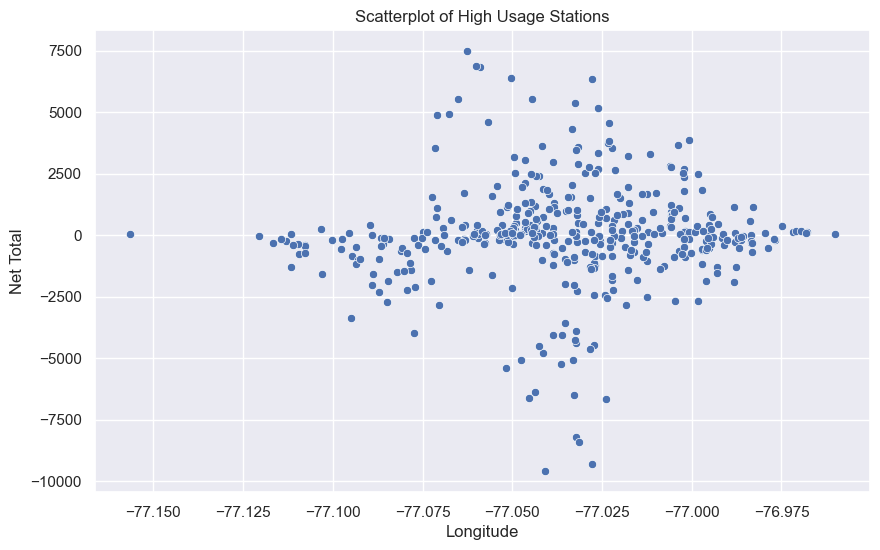

In [86]:
# Applying the high usage mask
high_usage_stations = stations[stations['daily_usage'] > 4.685]

# Create the scatterplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='start_lng', y='net_total', data=high_usage_stations)

# Adding titles and labels (optional, but recommended for clarity)
plt.title('Scatterplot of High Usage Stations')
plt.xlabel('Longitude')
plt.ylabel('Net Total')

# Show the plot
plt.show()


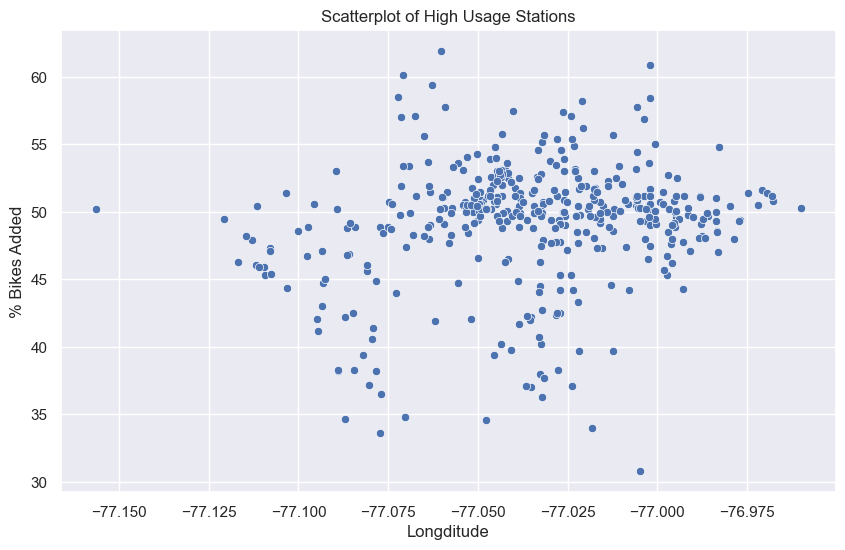

In [93]:
# Applying the high usage mask
high_usage_stations = stations[stations['daily_usage'] > 4.685]

# Create the scatterplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='start_lng', y='%_bikes_added', data=high_usage_stations)

# Adding titles and labels (optional, but recommended for clarity)
plt.title('Scatterplot of High Usage Stations')
plt.xlabel('Longditude')
plt.ylabel('% Bikes Added')

# Show the plot
plt.show()

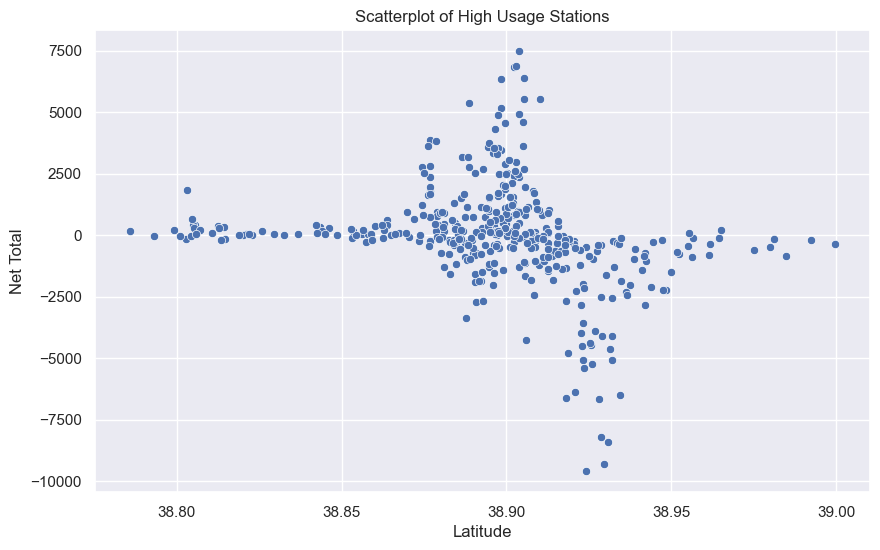

In [87]:
# Applying the high usage mask
high_usage_stations = stations[stations['daily_usage'] > 4.685]

# Create the scatterplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='start_lat', y='net_total', data=high_usage_stations)

# Adding titles and labels (optional, but recommended for clarity)
plt.title('Scatterplot of High Usage Stations')
plt.xlabel('Latitude')
plt.ylabel('Net Total')

# Show the plot
plt.show()

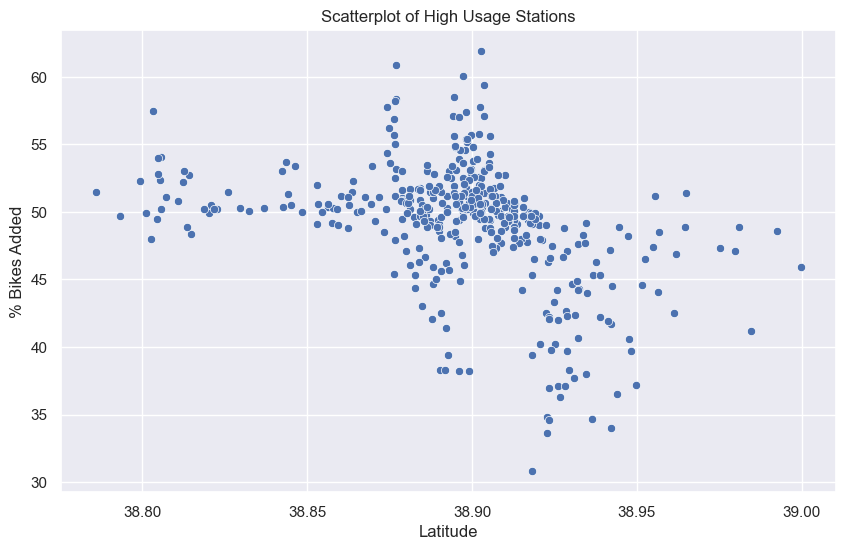

In [92]:
# Applying the high usage mask
high_usage_stations = stations[stations['daily_usage'] > 4.685]

# Create the scatterplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='start_lat', y='%_bikes_added', data=high_usage_stations)

# Adding titles and labels (optional, but recommended for clarity)
plt.title('Scatterplot of High Usage Stations')
plt.xlabel('Latitude')
plt.ylabel('% Bikes Added')

# Show the plot
plt.show()

In [95]:
display(stations.describe())

,start_count,end_count,net_total,daily_usage,%_bikes_added,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_lat,start_lng,normalized_net_total
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,7527.639364,7506.815403,-20.823961,16.503142,49.153545,-0.008362,-0.012433,-0.012188,-0.015636,38.862490,-76.972713,0.560867
std,11249.576289,11503.753886,1518.887457,24.922111,6.930896,3.131055,2.414253,2.085887,1.395394,1.361834,2.696143,0.088923
min,0.000000,0.000000,-9601.000000,0.000000,0.000000,-12.900000,-11.100000,-7.800000,-13.920000,0.000000,-77.368416,0.000000
25%,470.000000,462.500000,-205.250000,1.017500,47.100000,-0.567500,-0.217500,-0.380000,-0.150000,38.877863,-77.094861,0.550070
50%,2218.000000,2068.000000,-5.500000,4.685000,49.800000,-0.030000,0.010000,-0.030000,0.000000,38.899957,-77.045064,0.561765
75%,10396.250000,9856.000000,119.000000,22.895000,51.400000,0.100000,0.317500,0.060000,0.190000,38.932856,-77.011933,0.569053
max,72868.000000,72098.000000,7480.000000,159.130000,100.000000,15.560000,12.530000,13.430000,6.280000,39.125828,0.000000,1.000000


In [96]:
stations.to_csv('saved_stations')